In [1]:
#import sys
#!{sys.executable} -m pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
import os
for dirname, _, filenames in os.walk('dataset_input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset_input\Meta.csv
dataset_input\Test.csv
dataset_input\Train.csv
dataset_input\Meta\.~lock.ClassesInformation.ods#
dataset_input\Meta\.~lock.ClassesInformationStrong.ods#
dataset_input\Meta\0.png
dataset_input\Meta\1.png
dataset_input\Meta\10.png
dataset_input\Meta\11.png
dataset_input\Meta\12.png
dataset_input\Meta\13.png
dataset_input\Meta\14.png
dataset_input\Meta\15.png
dataset_input\Meta\16.png
dataset_input\Meta\17.png
dataset_input\Meta\18.png
dataset_input\Meta\19.png
dataset_input\Meta\2.png
dataset_input\Meta\20.png
dataset_input\Meta\21.png
dataset_input\Meta\22.png
dataset_input\Meta\23.png
dataset_input\Meta\24.png
dataset_input\Meta\25.png
dataset_input\Meta\26.png
dataset_input\Meta\27.png
dataset_input\Meta\28.png
dataset_input\Meta\29.png
dataset_input\Meta\3.png
dataset_input\Meta\30.png
dataset_input\Meta\31.png
dataset_input\Meta\32.png
dataset_input\Meta\33.png
dataset_input\Meta\34.png
dataset_input\Meta\35.png
dataset_input\Meta\36.png
dataset_input\Meta\37.

dataset_input\Test\02498.png
dataset_input\Test\02499.png
dataset_input\Test\02500.png
dataset_input\Test\02501.png
dataset_input\Test\02502.png
dataset_input\Test\02503.png
dataset_input\Test\02504.png
dataset_input\Test\02505.png
dataset_input\Test\02506.png
dataset_input\Test\02507.png
dataset_input\Test\02508.png
dataset_input\Test\02509.png
dataset_input\Test\02510.png
dataset_input\Test\02511.png
dataset_input\Test\02512.png
dataset_input\Test\02513.png
dataset_input\Test\02514.png
dataset_input\Test\02515.png
dataset_input\Test\02516.png
dataset_input\Test\02517.png
dataset_input\Test\02518.png
dataset_input\Test\02519.png
dataset_input\Test\02520.png
dataset_input\Test\02521.png
dataset_input\Test\02522.png
dataset_input\Test\02523.png
dataset_input\Test\02524.png
dataset_input\Test\02525.png
dataset_input\Test\02526.png
dataset_input\Test\02527.png
dataset_input\Test\02528.png
dataset_input\Test\02529.png
dataset_input\Test\02530.png
dataset_input\Test\02531.png
dataset_input\

dataset_input\Test\06411.png
dataset_input\Test\06412.png
dataset_input\Test\06413.png
dataset_input\Test\06414.png
dataset_input\Test\06415.png
dataset_input\Test\06416.png
dataset_input\Test\06417.png
dataset_input\Test\06418.png
dataset_input\Test\06419.png
dataset_input\Test\06420.png
dataset_input\Test\06421.png
dataset_input\Test\06422.png
dataset_input\Test\06423.png
dataset_input\Test\06424.png
dataset_input\Test\06425.png
dataset_input\Test\06426.png
dataset_input\Test\06427.png
dataset_input\Test\06428.png
dataset_input\Test\06429.png
dataset_input\Test\06430.png
dataset_input\Test\06431.png
dataset_input\Test\06432.png
dataset_input\Test\06433.png
dataset_input\Test\06434.png
dataset_input\Test\06435.png
dataset_input\Test\06436.png
dataset_input\Test\06437.png
dataset_input\Test\06438.png
dataset_input\Test\06439.png
dataset_input\Test\06440.png
dataset_input\Test\06441.png
dataset_input\Test\06442.png
dataset_input\Test\06443.png
dataset_input\Test\06444.png
dataset_input\

dataset_input\Test\10410.png
dataset_input\Test\10411.png
dataset_input\Test\10412.png
dataset_input\Test\10413.png
dataset_input\Test\10414.png
dataset_input\Test\10415.png
dataset_input\Test\10416.png
dataset_input\Test\10417.png
dataset_input\Test\10418.png
dataset_input\Test\10419.png
dataset_input\Test\10420.png
dataset_input\Test\10421.png
dataset_input\Test\10422.png
dataset_input\Test\10423.png
dataset_input\Test\10424.png
dataset_input\Test\10425.png
dataset_input\Test\10426.png
dataset_input\Test\10427.png
dataset_input\Test\10428.png
dataset_input\Test\10429.png
dataset_input\Test\10430.png
dataset_input\Test\10431.png
dataset_input\Test\10432.png
dataset_input\Test\10433.png
dataset_input\Test\10434.png
dataset_input\Test\10435.png
dataset_input\Test\10436.png
dataset_input\Test\10437.png
dataset_input\Test\10438.png
dataset_input\Test\10439.png
dataset_input\Test\10440.png
dataset_input\Test\10441.png
dataset_input\Test\10442.png
dataset_input\Test\10443.png
dataset_input\

dataset_input\Train\1\00001_00000_00000.png
dataset_input\Train\1\00001_00000_00001.png
dataset_input\Train\1\00001_00000_00002.png
dataset_input\Train\1\00001_00000_00003.png
dataset_input\Train\1\00001_00000_00004.png
dataset_input\Train\1\00001_00000_00005.png
dataset_input\Train\1\00001_00000_00006.png
dataset_input\Train\1\00001_00000_00007.png
dataset_input\Train\1\00001_00000_00008.png
dataset_input\Train\1\00001_00000_00009.png
dataset_input\Train\1\00001_00000_00010.png
dataset_input\Train\1\00001_00000_00011.png
dataset_input\Train\1\00001_00000_00012.png
dataset_input\Train\1\00001_00000_00013.png
dataset_input\Train\1\00001_00000_00014.png
dataset_input\Train\1\00001_00000_00015.png
dataset_input\Train\1\00001_00000_00016.png
dataset_input\Train\1\00001_00000_00017.png
dataset_input\Train\1\00001_00000_00018.png
dataset_input\Train\1\00001_00000_00019.png
dataset_input\Train\1\00001_00000_00020.png
dataset_input\Train\1\00001_00000_00021.png
dataset_input\Train\1\00001_0000

dataset_input\Train\10\00010_00036_00018.png
dataset_input\Train\10\00010_00036_00019.png
dataset_input\Train\10\00010_00036_00020.png
dataset_input\Train\10\00010_00036_00021.png
dataset_input\Train\10\00010_00036_00022.png
dataset_input\Train\10\00010_00036_00023.png
dataset_input\Train\10\00010_00036_00024.png
dataset_input\Train\10\00010_00036_00025.png
dataset_input\Train\10\00010_00036_00026.png
dataset_input\Train\10\00010_00036_00027.png
dataset_input\Train\10\00010_00036_00028.png
dataset_input\Train\10\00010_00036_00029.png
dataset_input\Train\10\00010_00037_00000.png
dataset_input\Train\10\00010_00037_00001.png
dataset_input\Train\10\00010_00037_00002.png
dataset_input\Train\10\00010_00037_00003.png
dataset_input\Train\10\00010_00037_00004.png
dataset_input\Train\10\00010_00037_00005.png
dataset_input\Train\10\00010_00037_00006.png
dataset_input\Train\10\00010_00037_00007.png
dataset_input\Train\10\00010_00037_00008.png
dataset_input\Train\10\00010_00037_00009.png
dataset_in

dataset_input\Train\12\00012_00000_00000.png
dataset_input\Train\12\00012_00000_00001.png
dataset_input\Train\12\00012_00000_00002.png
dataset_input\Train\12\00012_00000_00003.png
dataset_input\Train\12\00012_00000_00004.png
dataset_input\Train\12\00012_00000_00005.png
dataset_input\Train\12\00012_00000_00006.png
dataset_input\Train\12\00012_00000_00007.png
dataset_input\Train\12\00012_00000_00008.png
dataset_input\Train\12\00012_00000_00009.png
dataset_input\Train\12\00012_00000_00010.png
dataset_input\Train\12\00012_00000_00011.png
dataset_input\Train\12\00012_00000_00012.png
dataset_input\Train\12\00012_00000_00013.png
dataset_input\Train\12\00012_00000_00014.png
dataset_input\Train\12\00012_00000_00015.png
dataset_input\Train\12\00012_00000_00016.png
dataset_input\Train\12\00012_00000_00017.png
dataset_input\Train\12\00012_00000_00018.png
dataset_input\Train\12\00012_00000_00019.png
dataset_input\Train\12\00012_00000_00020.png
dataset_input\Train\12\00012_00000_00021.png
dataset_in

dataset_input\Train\13\00013_00030_00018.png
dataset_input\Train\13\00013_00030_00019.png
dataset_input\Train\13\00013_00030_00020.png
dataset_input\Train\13\00013_00030_00021.png
dataset_input\Train\13\00013_00030_00022.png
dataset_input\Train\13\00013_00030_00023.png
dataset_input\Train\13\00013_00030_00024.png
dataset_input\Train\13\00013_00030_00025.png
dataset_input\Train\13\00013_00030_00026.png
dataset_input\Train\13\00013_00030_00027.png
dataset_input\Train\13\00013_00030_00028.png
dataset_input\Train\13\00013_00030_00029.png
dataset_input\Train\13\00013_00031_00000.png
dataset_input\Train\13\00013_00031_00001.png
dataset_input\Train\13\00013_00031_00002.png
dataset_input\Train\13\00013_00031_00003.png
dataset_input\Train\13\00013_00031_00004.png
dataset_input\Train\13\00013_00031_00005.png
dataset_input\Train\13\00013_00031_00006.png
dataset_input\Train\13\00013_00031_00007.png
dataset_input\Train\13\00013_00031_00008.png
dataset_input\Train\13\00013_00031_00009.png
dataset_in

dataset_input\Train\16\00016_00000_00000.png
dataset_input\Train\16\00016_00000_00001.png
dataset_input\Train\16\00016_00000_00002.png
dataset_input\Train\16\00016_00000_00003.png
dataset_input\Train\16\00016_00000_00004.png
dataset_input\Train\16\00016_00000_00005.png
dataset_input\Train\16\00016_00000_00006.png
dataset_input\Train\16\00016_00000_00007.png
dataset_input\Train\16\00016_00000_00008.png
dataset_input\Train\16\00016_00000_00009.png
dataset_input\Train\16\00016_00000_00010.png
dataset_input\Train\16\00016_00000_00011.png
dataset_input\Train\16\00016_00000_00012.png
dataset_input\Train\16\00016_00000_00013.png
dataset_input\Train\16\00016_00000_00014.png
dataset_input\Train\16\00016_00000_00015.png
dataset_input\Train\16\00016_00000_00016.png
dataset_input\Train\16\00016_00000_00017.png
dataset_input\Train\16\00016_00000_00018.png
dataset_input\Train\16\00016_00000_00019.png
dataset_input\Train\16\00016_00000_00020.png
dataset_input\Train\16\00016_00000_00021.png
dataset_in

dataset_input\Train\2\00002_00000_00000.png
dataset_input\Train\2\00002_00000_00001.png
dataset_input\Train\2\00002_00000_00002.png
dataset_input\Train\2\00002_00000_00003.png
dataset_input\Train\2\00002_00000_00004.png
dataset_input\Train\2\00002_00000_00005.png
dataset_input\Train\2\00002_00000_00006.png
dataset_input\Train\2\00002_00000_00007.png
dataset_input\Train\2\00002_00000_00008.png
dataset_input\Train\2\00002_00000_00009.png
dataset_input\Train\2\00002_00000_00010.png
dataset_input\Train\2\00002_00000_00011.png
dataset_input\Train\2\00002_00000_00012.png
dataset_input\Train\2\00002_00000_00013.png
dataset_input\Train\2\00002_00000_00014.png
dataset_input\Train\2\00002_00000_00015.png
dataset_input\Train\2\00002_00000_00016.png
dataset_input\Train\2\00002_00000_00017.png
dataset_input\Train\2\00002_00000_00018.png
dataset_input\Train\2\00002_00000_00019.png
dataset_input\Train\2\00002_00000_00020.png
dataset_input\Train\2\00002_00000_00021.png
dataset_input\Train\2\00002_0000

dataset_input\Train\23\00023_00000_00000.png
dataset_input\Train\23\00023_00000_00001.png
dataset_input\Train\23\00023_00000_00002.png
dataset_input\Train\23\00023_00000_00003.png
dataset_input\Train\23\00023_00000_00004.png
dataset_input\Train\23\00023_00000_00005.png
dataset_input\Train\23\00023_00000_00006.png
dataset_input\Train\23\00023_00000_00007.png
dataset_input\Train\23\00023_00000_00008.png
dataset_input\Train\23\00023_00000_00009.png
dataset_input\Train\23\00023_00000_00010.png
dataset_input\Train\23\00023_00000_00011.png
dataset_input\Train\23\00023_00000_00012.png
dataset_input\Train\23\00023_00000_00013.png
dataset_input\Train\23\00023_00000_00014.png
dataset_input\Train\23\00023_00000_00015.png
dataset_input\Train\23\00023_00000_00016.png
dataset_input\Train\23\00023_00000_00017.png
dataset_input\Train\23\00023_00000_00018.png
dataset_input\Train\23\00023_00000_00019.png
dataset_input\Train\23\00023_00000_00020.png
dataset_input\Train\23\00023_00000_00021.png
dataset_in

dataset_input\Train\28\00028_00000_00000.png
dataset_input\Train\28\00028_00000_00001.png
dataset_input\Train\28\00028_00000_00002.png
dataset_input\Train\28\00028_00000_00003.png
dataset_input\Train\28\00028_00000_00004.png
dataset_input\Train\28\00028_00000_00005.png
dataset_input\Train\28\00028_00000_00006.png
dataset_input\Train\28\00028_00000_00007.png
dataset_input\Train\28\00028_00000_00008.png
dataset_input\Train\28\00028_00000_00009.png
dataset_input\Train\28\00028_00000_00010.png
dataset_input\Train\28\00028_00000_00011.png
dataset_input\Train\28\00028_00000_00012.png
dataset_input\Train\28\00028_00000_00013.png
dataset_input\Train\28\00028_00000_00014.png
dataset_input\Train\28\00028_00000_00015.png
dataset_input\Train\28\00028_00000_00016.png
dataset_input\Train\28\00028_00000_00017.png
dataset_input\Train\28\00028_00000_00018.png
dataset_input\Train\28\00028_00000_00019.png
dataset_input\Train\28\00028_00000_00020.png
dataset_input\Train\28\00028_00000_00021.png
dataset_in

dataset_input\Train\30\00030_00008_00021.png
dataset_input\Train\30\00030_00008_00022.png
dataset_input\Train\30\00030_00008_00023.png
dataset_input\Train\30\00030_00008_00024.png
dataset_input\Train\30\00030_00008_00025.png
dataset_input\Train\30\00030_00008_00026.png
dataset_input\Train\30\00030_00008_00027.png
dataset_input\Train\30\00030_00008_00028.png
dataset_input\Train\30\00030_00008_00029.png
dataset_input\Train\30\00030_00009_00000.png
dataset_input\Train\30\00030_00009_00001.png
dataset_input\Train\30\00030_00009_00002.png
dataset_input\Train\30\00030_00009_00003.png
dataset_input\Train\30\00030_00009_00004.png
dataset_input\Train\30\00030_00009_00005.png
dataset_input\Train\30\00030_00009_00006.png
dataset_input\Train\30\00030_00009_00007.png
dataset_input\Train\30\00030_00009_00008.png
dataset_input\Train\30\00030_00009_00009.png
dataset_input\Train\30\00030_00009_00010.png
dataset_input\Train\30\00030_00009_00011.png
dataset_input\Train\30\00030_00009_00012.png
dataset_in

dataset_input\Train\35\00035_00004_00025.png
dataset_input\Train\35\00035_00004_00026.png
dataset_input\Train\35\00035_00004_00027.png
dataset_input\Train\35\00035_00004_00028.png
dataset_input\Train\35\00035_00004_00029.png
dataset_input\Train\35\00035_00005_00000.png
dataset_input\Train\35\00035_00005_00001.png
dataset_input\Train\35\00035_00005_00002.png
dataset_input\Train\35\00035_00005_00003.png
dataset_input\Train\35\00035_00005_00004.png
dataset_input\Train\35\00035_00005_00005.png
dataset_input\Train\35\00035_00005_00006.png
dataset_input\Train\35\00035_00005_00007.png
dataset_input\Train\35\00035_00005_00008.png
dataset_input\Train\35\00035_00005_00009.png
dataset_input\Train\35\00035_00005_00010.png
dataset_input\Train\35\00035_00005_00011.png
dataset_input\Train\35\00035_00005_00012.png
dataset_input\Train\35\00035_00005_00013.png
dataset_input\Train\35\00035_00005_00014.png
dataset_input\Train\35\00035_00005_00015.png
dataset_input\Train\35\00035_00005_00016.png
dataset_in

dataset_input\Train\38\00038_00033_00013.png
dataset_input\Train\38\00038_00033_00014.png
dataset_input\Train\38\00038_00033_00015.png
dataset_input\Train\38\00038_00033_00016.png
dataset_input\Train\38\00038_00033_00017.png
dataset_input\Train\38\00038_00033_00018.png
dataset_input\Train\38\00038_00033_00019.png
dataset_input\Train\38\00038_00033_00020.png
dataset_input\Train\38\00038_00033_00021.png
dataset_input\Train\38\00038_00033_00022.png
dataset_input\Train\38\00038_00033_00023.png
dataset_input\Train\38\00038_00033_00024.png
dataset_input\Train\38\00038_00033_00025.png
dataset_input\Train\38\00038_00033_00026.png
dataset_input\Train\38\00038_00033_00027.png
dataset_input\Train\38\00038_00033_00028.png
dataset_input\Train\38\00038_00033_00029.png
dataset_input\Train\38\00038_00034_00000.png
dataset_input\Train\38\00038_00034_00001.png
dataset_input\Train\38\00038_00034_00002.png
dataset_input\Train\38\00038_00034_00003.png
dataset_input\Train\38\00038_00034_00004.png
dataset_in

dataset_input\Train\4\00004_00049_00014.png
dataset_input\Train\4\00004_00049_00015.png
dataset_input\Train\4\00004_00049_00016.png
dataset_input\Train\4\00004_00049_00017.png
dataset_input\Train\4\00004_00049_00018.png
dataset_input\Train\4\00004_00049_00019.png
dataset_input\Train\4\00004_00049_00020.png
dataset_input\Train\4\00004_00049_00021.png
dataset_input\Train\4\00004_00049_00022.png
dataset_input\Train\4\00004_00049_00023.png
dataset_input\Train\4\00004_00049_00024.png
dataset_input\Train\4\00004_00049_00025.png
dataset_input\Train\4\00004_00049_00026.png
dataset_input\Train\4\00004_00049_00027.png
dataset_input\Train\4\00004_00049_00028.png
dataset_input\Train\4\00004_00049_00029.png
dataset_input\Train\4\00004_00050_00000.png
dataset_input\Train\4\00004_00050_00001.png
dataset_input\Train\4\00004_00050_00002.png
dataset_input\Train\4\00004_00050_00003.png
dataset_input\Train\4\00004_00050_00004.png
dataset_input\Train\4\00004_00050_00005.png
dataset_input\Train\4\00004_0005

dataset_input\Train\5\00005_00038_00024.png
dataset_input\Train\5\00005_00038_00025.png
dataset_input\Train\5\00005_00038_00026.png
dataset_input\Train\5\00005_00038_00027.png
dataset_input\Train\5\00005_00038_00028.png
dataset_input\Train\5\00005_00038_00029.png
dataset_input\Train\5\00005_00039_00000.png
dataset_input\Train\5\00005_00039_00001.png
dataset_input\Train\5\00005_00039_00002.png
dataset_input\Train\5\00005_00039_00003.png
dataset_input\Train\5\00005_00039_00004.png
dataset_input\Train\5\00005_00039_00005.png
dataset_input\Train\5\00005_00039_00006.png
dataset_input\Train\5\00005_00039_00007.png
dataset_input\Train\5\00005_00039_00008.png
dataset_input\Train\5\00005_00039_00009.png
dataset_input\Train\5\00005_00039_00010.png
dataset_input\Train\5\00005_00039_00011.png
dataset_input\Train\5\00005_00039_00012.png
dataset_input\Train\5\00005_00039_00013.png
dataset_input\Train\5\00005_00039_00014.png
dataset_input\Train\5\00005_00039_00015.png
dataset_input\Train\5\00005_0003

dataset_input\Train\8\00008_00024_00005.png
dataset_input\Train\8\00008_00024_00006.png
dataset_input\Train\8\00008_00024_00007.png
dataset_input\Train\8\00008_00024_00008.png
dataset_input\Train\8\00008_00024_00009.png
dataset_input\Train\8\00008_00024_00010.png
dataset_input\Train\8\00008_00024_00011.png
dataset_input\Train\8\00008_00024_00012.png
dataset_input\Train\8\00008_00024_00013.png
dataset_input\Train\8\00008_00024_00014.png
dataset_input\Train\8\00008_00024_00015.png
dataset_input\Train\8\00008_00024_00016.png
dataset_input\Train\8\00008_00024_00017.png
dataset_input\Train\8\00008_00024_00018.png
dataset_input\Train\8\00008_00024_00019.png
dataset_input\Train\8\00008_00024_00020.png
dataset_input\Train\8\00008_00024_00021.png
dataset_input\Train\8\00008_00024_00022.png
dataset_input\Train\8\00008_00024_00023.png
dataset_input\Train\8\00008_00024_00024.png
dataset_input\Train\8\00008_00024_00025.png
dataset_input\Train\8\00008_00024_00026.png
dataset_input\Train\8\00008_0002

In [4]:
data_path = 'dataset_input'
train = 'dataset_input/Train'
test = 'dataset_input/Test'

In [5]:
categories = len(os.listdir(train))
print('Categories:', categories)

Categories: 43


In [6]:
train_info = pd.read_csv("dataset_input/Train.csv")
train_info.head()
train_info.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [7]:
train_info.groupby('ClassId')['ClassId'].count()

ClassId
0      210
1     2220
2     2250
3     1410
4     1980
5     1860
6      420
7     1440
8     1410
9     1470
10    2010
11    1320
12    2100
13    2160
14     780
15     630
16     420
17    1110
18    1200
19     210
20     360
21     330
22     390
23     510
24     270
25    1500
26     600
27     240
28     540
29     270
30     450
31     780
32     240
33     689
34     420
35    1200
36     390
37     210
38    2070
39     300
40     360
41     240
42     240
Name: ClassId, dtype: int64

In [8]:
data = []
labels = []

for i in range(categories):
    path = data_path + '/Train/' + str(i) 
    images = os.listdir(path) 

    for img in images:
        try:
            image = cv2.imread(path + '/' + img) 
            image_fromarray = Image.fromarray(image, 'RGB') 
            resize_image = image_fromarray.resize((64, 64)) #increased from 32 to 64
            data.append(np.array(resize_image))
            labels.append(i)
        except:
            print("Error in loading image")

In [9]:
data = np.array(data)
labels = np.array(labels)
data.shape, labels.shape

((39209, 64, 64, 3), (39209,))

In [10]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((31367, 64, 64, 3), (7842, 64, 64, 3), (31367,), (7842,))

In [11]:
x_train = x_train/255 
x_val = x_val/255

In [12]:
y_train = keras.utils.to_categorical(y_train, categories)
y_val = keras.utils.to_categorical(y_val, categories)
y_train.shape, y_val.shape

((31367, 43), (7842, 43))

In [13]:
# Define Model
model=Sequential()
model.add(InputLayer(input_shape=(64,64,3))) #increased from 32 to 64
model.add(Reshape(target_shape=(64,64, 3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))#increased from 12 to 32
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4)) #increased the dropout percentage from 0.2 to 0.4
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(43, activation='softmax')) #GTSRB 43 categories

In [14]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train model
training = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_val, y_val))  #batch size changed from 128 to 32 and epoch rfom 3 to 15

Epoch 1/15
981/981 [==============================] - 266s 267ms/step - loss: 0.3464 - accuracy: 0.9079 - val_loss: 0.0793 - val_accuracy: 0.9823
Epoch 2/15
981/981 [==============================] - 257s 262ms/step - loss: 0.0555 - accuracy: 0.9851 - val_loss: 1.6492 - val_accuracy: 0.6804
Epoch 3/15
981/981 [==============================] - 253s 258ms/step - loss: 0.0268 - accuracy: 0.9921 - val_loss: 0.0385 - val_accuracy: 0.9904
Epoch 4/15
489/981 [=============>................] - ETA: 2:04 - loss: 0.0147 - accuracy: 0.9957

In [25]:
_,accuracy=model.evaluate(x_val,y_val)

246/246 [==============================] - 11s 43ms/step - loss: 0.0311 - accuracy: 0.9925


In [26]:
print('Test accuracy', accuracy)

Test accuracy 0.9924764037132263


In [27]:
model.save("my_model.h5")

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0

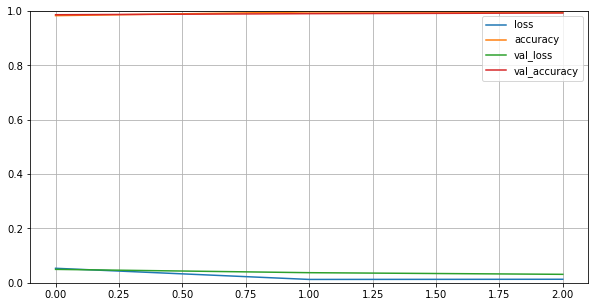

In [29]:
pd.DataFrame(training.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
path = data_path + '/Train/' + str(0)
path

'dataset_input/Train/0'

In [ ]:
images = os.listdir(path)
images

In [ ]:
image = cv2.imread(path + '/' + images[0])
image

In [ ]:
from keras.preprocessing import image
img = image.load_img("00001.png",target_size=(64,64))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("my_model.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Speed limit (30km/h)")
else:
    print('failed')